# Module 7 Bonus - Ryan Smith

#### Historical Average Price in April for Berkshire Hathaway Series A Stock (BRK.A)

In [1]:
import pandas as pd

In [2]:
brk = pd.read_csv('AprilStockPricesBRK_A_1980-2021.csv')

In [3]:
brk.head()

,Year,Stock Average
0,1980,275.24
1,1981,508.33
2,1982,509.52
3,1983,942.75
4,1984,1268.50


In [4]:
brk.tail()

,Year,Stock Average
37,2017,249640.59
38,2018,299431.55
39,2019,314395.83
40,2020,283204.25
41,2021,405982.19


In [5]:
brk.columns = ['Year','Avg_Price'] 

In [6]:
brk.head()

,Year,Avg_Price
0,1980,275.24
1,1981,508.33
2,1982,509.52
3,1983,942.75
4,1984,1268.50


In [7]:
pd.set_option('precision', 2)

In [8]:
brk.Avg_Price.describe()

count        42.00
mean      92310.75
std      102469.19
min         275.24
25%        7154.98
50%       69923.93
75%      122826.06
max      405982.19
Name: Avg_Price, dtype: float64

In [9]:
from scipy import stats

In [10]:
linear_regression = stats.linregress(x=brk.Year, y=brk.Avg_Price)

In [11]:
linear_regression.slope

7524.387915079815

In [12]:
linear_regression.intercept

-14960227.276498122

In [13]:
linear_regression.slope * 2000 + linear_regression.intercept

88548.55366150662

In [14]:
linear_regression.slope * 2010 + linear_regression.intercept

163792.43281230517

In [15]:
import seaborn as sns

In [16]:
sns.set_style('whitegrid')

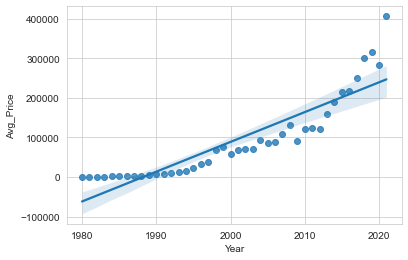

In [17]:
axes = sns.regplot(x=brk.Year, y=brk.Avg_Price)

# Predicting the future of the stock

In [18]:
%matplotlib inline

In [19]:
import pandas as pd

In [20]:
brk = pd.read_csv('AprilStockPricesBRK_A_1980-2021.csv')

In [21]:
brk.columns = ['Year', 'AvgPrice']

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
     brk.Year.values.reshape(-1, 1), brk.AvgPrice.values, 
     random_state=11)

In [24]:
X_train.shape

(31, 1)

In [25]:
X_test.shape

(11, 1)

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
linear_regression = LinearRegression()

In [28]:
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [29]:
linear_regression.coef_

array([6986.08131012])

In [30]:
linear_regression.intercept_

-13880262.875604838

In [31]:
predicted = linear_regression.predict(X_test)

In [32]:
expected = y_test

In [33]:
for p, e in zip(predicted[::5], expected[::5]):
     print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 91899.74, expected: 58552.63
predicted: 112857.99, expected: 70838.10
predicted: 49983.26, expected: 16101.32


In [34]:
predict = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_)

In [35]:
predict(2025)

array([266551.77739167])

In [36]:
predict(2055)

array([476134.21669533])

In [37]:
import seaborn as sns

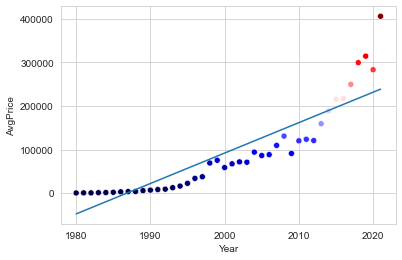

In [38]:
axes = sns.scatterplot(data=brk, x='Year', y='AvgPrice',
     hue='AvgPrice', palette='seismic', legend=False)

#axes.set_ylim(10, 70)

import numpy as np

x = np.array([min(brk.Year.values), max(brk.Year.values)])

y = predict(x)

import matplotlib.pyplot as plt 

line = plt.plot(x, y)